In [150]:
import torch
import torch.nn as nn
from torch import Tensor
import matplotlib.pyplot as plt

In [2]:
class PositionalEncoding(nn.Module):

    def __init__(self, dim_out: int):
        super().__init__()
        self.dim_out = dim_out
        self.n = 10000

    def forward(self, pos):
        even = torch.arange(0, 2 * self.dim_out / 2, 2).view(1, -1).repeat(pos.size(0), 1)
        odd = torch.arange(1, 2 * self.dim_out / 2 + 1, 2).view(1, -1).repeat(pos.size(0), 1)
        pos = pos.view(-1, 1)
        even = torch.sin(pos / torch.pow(self.n, (even / self.dim_out)))
        odd = torch.cos(pos / torch.pow(self.n, (odd / self.dim_out)))
        out = torch.zeros(pos.shape[0], self.dim_out)
        out[:, 0::2] = even
        out[:, 1::2] = odd
        return out 

In [3]:
d = 100
sequence_length = 200

pe = PositionalEncoding(d)
x = torch.tensor(range(0, sequence_length))
y = pe(x)
print(y.shape)

torch.Size([200, 100])


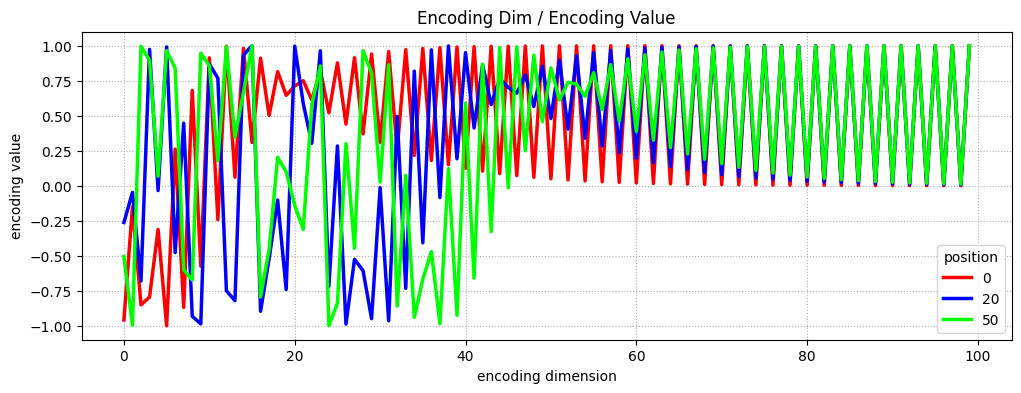

In [82]:
plt.figure(figsize=(12,4))
plt.plot(y[5].numpy(), label="0", linewidth=2.5, c='r')
plt.plot(y[50].numpy(), label="20", linewidth=2.5, c='b')
plt.plot(y[100].numpy(), label="50", linewidth=2.5, c='lime')
plt.xlabel('encoding dimension')
plt.ylabel('encoding value')
plt.legend(title="position")
plt.title('Encoding Dim / Encoding Value')
plt.grid(True, linestyle=':')

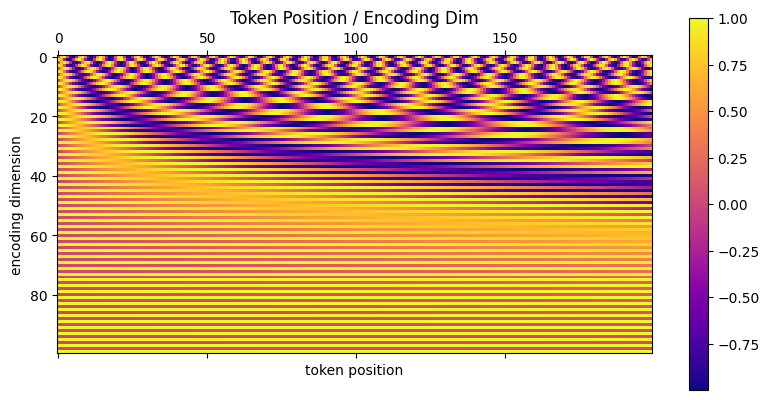

In [81]:
cax = plt.matshow(y.numpy().transpose(), cmap='plasma')
plt.gcf().colorbar(cax)
plt.xlabel('token position')
plt.ylabel('encoding dimension')
plt.title('Token Position / Encoding Dim')
plt.show()

In [110]:
d = 8
sequence_length = 32

pe = PositionalEncoding(d)
x = torch.tensor(range(0, sequence_length))
y = pe(x)
print(y.shape)

torch.Size([32, 8])


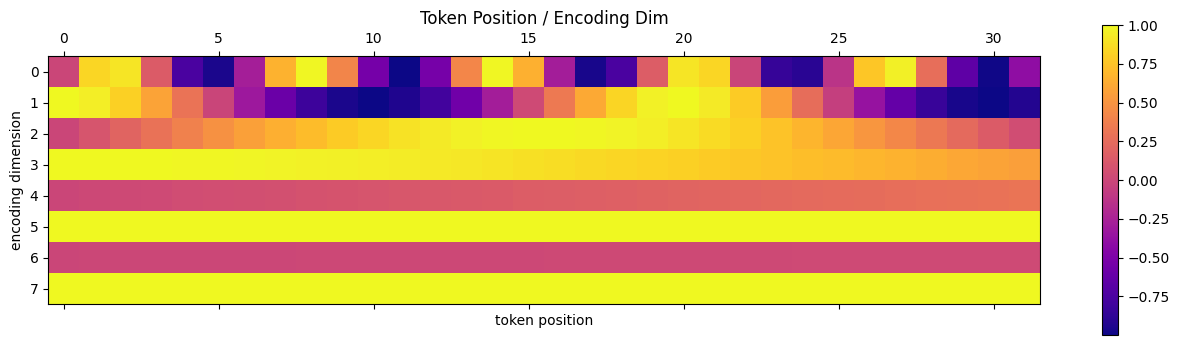

In [111]:
cax = plt.matshow(y.numpy().transpose(), cmap='plasma')
plt.gcf().colorbar(cax)
plt.xlabel('token position')
plt.ylabel('encoding dimension')
plt.title('Token Position / Encoding Dim')
plt.show()

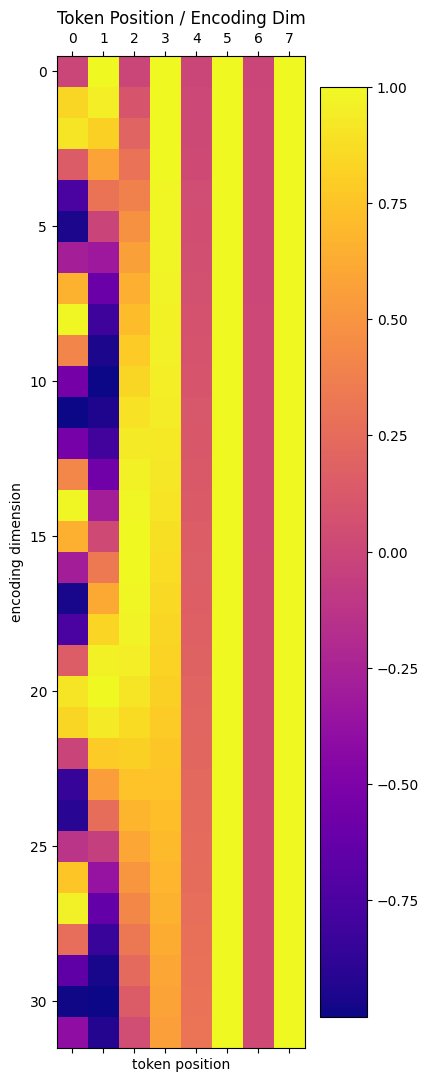

In [112]:
cax = plt.matshow(y.numpy(), cmap='plasma')
plt.gcf().colorbar(cax)
plt.xlabel('token position')
plt.ylabel('encoding dimension')
plt.title('Token Position / Encoding Dim')
plt.show()

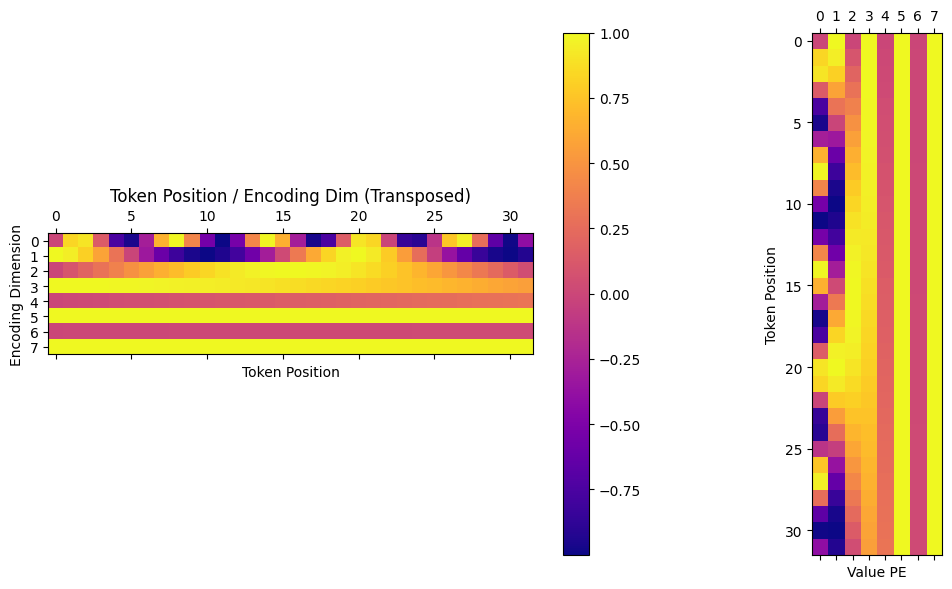

In [119]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que y seja um tensor ou array numpy que você já tem

fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Cria 1 linha e 2 colunas de subplots

# Primeiro gráfico
cax1 = axs[0].matshow(y.numpy().transpose(), cmap='plasma')
fig.colorbar(cax1, ax=axs[0])
axs[0].set_xlabel('Token Position')
axs[0].set_ylabel('Encoding Dimension')
axs[0].set_title('Token Position / Encoding Dim (Transposed)')

# Segundo gráfico
cax2 = axs[1].matshow(y.numpy(), cmap='plasma')
# fig.colorbar(cax2, ax=axs[1])
axs[1].set_xlabel('Value PE')
axs[1].set_ylabel('Token Position')
axs[1].set_title('')

plt.tight_layout()  # Ajusta o layout para que os subplots não se sobreponham
plt.show()

In [91]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model: int = D_MODEL, dropout: float = 0.01, seq_len: int = SEQ_LEN):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)
        
        pe = torch.zeros(SEQ_LEN, D_MODEL)
        k = torch.arange(0, seq_len).unsqueeze(1) 
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10_000) / d_model))
        # sine for even indices
        pe[:, 0::2] = torch.sin(k * div_term)
        # cos for odd indices
        pe[:, 1::2] = torch.cos(k * div_term)
        # add batch dim
        pe = pe.unsqueeze(0)

        self.register_buffer('pe', pe)

    def forward(self, x: Tensor):
        x = x + self.pe[:, :x.size(1)].requires_grad_(False)
        return self.dropout(x)

In [92]:
x_emb = torch.rand(1, SEQ_LEN, D_MODEL)

In [93]:
x_emb.size()

torch.Size([1, 10, 4])

In [94]:
pe.state_dict()

OrderedDict([('pe',
              tensor([[[ 0.0000,  1.0000,  0.0000,  1.0000],
                       [ 0.8415,  0.5403,  0.0100,  0.9999],
                       [ 0.9093, -0.4161,  0.0200,  0.9998],
                       [ 0.1411, -0.9900,  0.0300,  0.9996],
                       [-0.7568, -0.6536,  0.0400,  0.9992],
                       [-0.9589,  0.2837,  0.0500,  0.9988],
                       [-0.2794,  0.9602,  0.0600,  0.9982],
                       [ 0.6570,  0.7539,  0.0699,  0.9976],
                       [ 0.9894, -0.1455,  0.0799,  0.9968],
                       [ 0.4121, -0.9111,  0.0899,  0.9960]]]))])

In [95]:
pe = PositionalEncoding()

In [121]:
PositionalEncoding()(x_emb)

tensor([[[ 0.9795,  1.8936,  0.4087,  1.1217],
         [ 1.7548,  1.2443,  0.7030,  1.2658],
         [ 1.8984,  0.3939,  0.8002,  1.5705],
         [ 1.1410, -0.7805,  0.8774,  1.5228],
         [-0.3208,  0.2469,  0.0457,  1.0810],
         [-0.7581,  0.6306,  0.0563,  1.6611],
         [ 0.5314,  1.9263,  0.2776,  1.4601],
         [ 0.9415,  0.7851,  0.7260,  1.2089],
         [ 1.8960,  0.2503,  1.0639,  1.4316],
         [ 1.0831, -0.7743,  0.5343,  1.5218]]])

In [67]:
x_emb

tensor([[[0.1147, 0.3772, 0.5413, 0.0214],
         [0.9113, 0.6089, 0.4296, 0.2300],
         [0.5954, 0.9667, 0.3703, 0.0430],
         [0.1620, 0.2754, 0.9598, 0.9916],
         [0.0879, 0.2879, 0.6747, 0.8618],
         [0.9549, 0.0373, 0.0013, 0.9797],
         [0.5972, 0.1503, 0.0970, 0.0257],
         [0.4020, 0.4467, 0.9328, 0.6373],
         [0.7669, 0.5922, 0.2683, 0.8666],
         [0.7475, 0.1990, 0.5586, 0.8088]]])

In [44]:
x_emb + pe

tensor([[[ 0.9974,  2.6827,  0.7027,  2.5623],
         [ 2.2456,  1.2071,  0.1117,  2.8545],
         [ 2.7763, -0.1084,  0.5950,  2.2448],
         [ 0.9617, -1.7134,  0.1742,  2.4911],
         [-0.9631, -0.3587,  0.6031,  2.3675],
         [-0.9763,  1.0871,  0.1767,  2.9646],
         [-0.3025,  2.2445,  1.1034,  2.0276],
         [ 1.5623,  1.6272,  0.4129,  2.6975],
         [ 2.9694,  0.1814,  0.8310,  2.4111],
         [ 1.5781, -0.8517,  0.4454,  2.6208]]])

In [143]:
dropout = nn.Dropout(p=0.1)

In [149]:
dropout(x_emb)

tensor([[[1.0775, 0.9718, 0.4496, 0.1227],
         [0.9953, 0.7684, 0.7622, 0.2813],
         [1.0779, 0.8957, 0.8580, 0.6166],
         [1.0983, 0.2414, 0.9318, 0.5645],
         [0.4880, 0.9979, 0.0058, 0.0789],
         [0.2315, 0.3785, 0.0064, 0.7175],
         [0.8949, 1.0521, 0.2387, 0.4970],
         [0.3056, 0.0000, 0.7209, 0.2214],
         [0.9863, 0.4370, 1.0815, 0.0000],
         [0.7335, 0.1607, 0.0000, 0.5674]]])

In [152]:
from torchtune.modules import RotaryPositionalEmbeddings

In [156]:
RotaryPositionalEmbeddings(dim=D_MODEL, max_seq_len=SEQ_LEN)(x_emb).size()

torch.Size([1, 10, 10, 4])

In [159]:
x_emb

tensor([[[0.9697, 0.8746, 0.4046, 0.1104],
         [0.8957, 0.6916, 0.6860, 0.2532],
         [0.9701, 0.8061, 0.7722, 0.5550],
         [0.9885, 0.2173, 0.8386, 0.5080],
         [0.4392, 0.8981, 0.0052, 0.0710],
         [0.2084, 0.3406, 0.0057, 0.6458],
         [0.8055, 0.9469, 0.2148, 0.4473],
         [0.2751, 0.0233, 0.6488, 0.1992],
         [0.8877, 0.3933, 0.9734, 0.4205],
         [0.6601, 0.1446, 0.4391, 0.5107]]])

In [198]:
N_HEADS = 4
D_HEADS = 8

In [199]:
x = torch.rand(1, 4, N_HEADS, D_HEADS)

In [200]:
x

tensor([[[[0.6362, 0.3511, 0.1581, 0.1868, 0.6736, 0.5968, 0.6091, 0.4707],
          [0.6093, 0.6731, 0.4349, 0.1577, 0.7011, 0.8764, 0.3432, 0.4996],
          [0.6809, 0.4691, 0.3391, 0.7368, 0.8210, 0.3388, 0.8497, 0.9613],
          [0.4793, 0.8605, 0.7638, 0.2438, 0.7839, 0.9273, 0.9110, 0.6741]],

         [[0.5057, 0.4709, 0.4751, 0.9597, 0.2937, 0.8072, 0.0510, 0.1011],
          [0.4284, 0.8011, 0.8143, 0.0382, 0.1150, 0.7750, 0.2289, 0.0449],
          [0.1524, 0.7426, 0.7304, 0.0722, 0.0935, 0.0671, 0.2373, 0.3071],
          [0.9331, 0.2728, 0.1233, 0.8129, 0.2557, 0.7506, 0.3001, 0.2808]],

         [[0.5952, 0.0811, 0.8455, 0.7342, 0.5156, 0.7955, 0.9034, 0.6746],
          [0.1433, 0.0087, 0.2893, 0.6135, 0.9026, 0.7775, 0.5936, 0.1601],
          [0.6848, 0.3488, 0.1743, 0.4078, 0.5968, 0.5004, 0.0997, 0.8972],
          [0.3521, 0.0589, 0.3069, 0.8880, 0.7778, 0.1508, 0.0214, 0.3083]],

         [[0.4563, 0.8776, 0.2420, 0.3820, 0.4015, 0.8021, 0.3588, 0.9659],
      

In [201]:
RotaryPositionalEmbeddings(D_MODEL)(x)

RuntimeError: shape '[1, 4, 1, 4, 2]' is invalid for input of size 16